In [1]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
# PREPROCESSING

df = pd.read_csv("data_complete2.csv", index_col=0)
# sliding window
# df2 = pd.get_dummies(df['label_T-1'], prefix='label_T-1')

# for i in df2.columns:
#     print(i)
#     df[i] = df2[i]
    
df = df.drop("label_T-1", axis=1)

# temporal train test split
training_frac = 0.7

end_training_set = int(training_frac * len(df.index))
X_train = df.iloc[0:end_training_set,].drop("label", axis=1)
y_train = df.iloc[0:end_training_set, ]["label"]
X_test = df.iloc[end_training_set:len(df.index), ].drop("label", axis=1)
y_test = df.iloc[end_training_set:len(df.index), ]["label"]

In [3]:
df.columns.tolist()

['acc_avg_X (m/s^2)',
 'acc_avg_Y (m/s^2)',
 'acc_avg_Z (m/s^2)',
 'gyr_avg_X (rad/s)',
 'gyr_avg_Y (rad/s)',
 'gyr_avg_Z (rad/s)',
 'lin_acc_avg_X (m/s^2)',
 'lin_acc_avg_Y (m/s^2)',
 'lin_acc_avg_Z (m/s^2)',
 'mag_avg_X (µT)',
 'mag_avg_Y (µT)',
 'mag_avg_Z (µT)',
 'acc_std_X (m/s^2)',
 'acc_std_Y (m/s^2)',
 'acc_std_Z (m/s^2)',
 'gyr_std_X (rad/s)',
 'gyr_std_Y (rad/s)',
 'gyr_std_Z (rad/s)',
 'lin_acc_std_X (m/s^2)',
 'lin_acc_std_Y (m/s^2)',
 'lin_acc_std_Z (m/s^2)',
 'mag_std_X (µT)',
 'mag_std_Y (µT)',
 'mag_std_Z (µT)',
 'acc_min_X (m/s^2)',
 'acc_min_Y (m/s^2)',
 'acc_min_Z (m/s^2)',
 'gyr_min_X (rad/s)',
 'gyr_min_Y (rad/s)',
 'gyr_min_Z (rad/s)',
 'lin_acc_min_X (m/s^2)',
 'lin_acc_min_Y (m/s^2)',
 'lin_acc_min_Z (m/s^2)',
 'mag_min_X (µT)',
 'mag_min_Y (µT)',
 'mag_min_Z (µT)',
 'acc_max_X (m/s^2)',
 'acc_max_Y (m/s^2)',
 'acc_max_Z (m/s^2)',
 'gyr_max_X (rad/s)',
 'gyr_max_Y (rad/s)',
 'gyr_max_Z (rad/s)',
 'lin_acc_max_X (m/s^2)',
 'lin_acc_max_Y (m/s^2)',
 'lin_acc_max_Z

In [4]:
df["label"].value_counts()/len(df)

laying      0.359533
sitting     0.338660
standing    0.301808
Name: label, dtype: float64

In [5]:
y_train.value_counts()/len(y_train)

laying      0.363533
sitting     0.323584
standing    0.312883
Name: label, dtype: float64

In [6]:
y_test.value_counts()/len(y_test)

sitting     0.373835
laying      0.350200
standing    0.275965
Name: label, dtype: float64

In [123]:
y_pred

array(['standing', 'standing', 'standing', ..., 'sitting', 'sitting',
       'sitting'], dtype='<U8')

In [134]:
import random
y = []
for i in range(len(y_test)):
    y.append(random.sample(('standing', 'sitting', 'laying'),1))

In [135]:
# random baseline 
p = metrics.precision_score(y_test, y, average='macro')
print("Baseline Precision:", p)

Baseline Precision: 0.34428917457054425


# Naïve Bayes 

In [10]:
nb = GaussianNB()

In [11]:
nb.fit(X_train, y_train)

GaussianNB()

In [12]:
y_pred = nb.predict(X_test)
p1 = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision:", p1)

Precision: 0.776256296091096


# SVM (def)

In [16]:
svm = SVC(random_state=1)

In [17]:
svm.fit(X_train, y_train)

SVC(random_state=1)

In [18]:
y_pred = svm.predict(X_test)
p6 = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision:", p6)

Precision: 0.784040235874254


# SVM (ht)

* very slow (did only 5 iterations)

In [80]:
kernel = ["linear", "poly", "rbf", "sigmoid"]
degree = [3, 5, 7]
gamma = ["scale", "auto"]
shrinking = [True, False]

random_grid = {"kernel": kernel, 
              "degree": degree, 
              "gamma": gamma,
              "shrinking": shrinking}

svm_ = SVC()
scorer = metrics.make_scorer(metrics.precision_score, average = 'macro')
svm_random = RandomizedSearchCV(estimator = svm_, param_distributions = random_grid, scoring=scorer,
                                n_iter = 15, cv = 5, random_state = 1, n_jobs = -1, verbose = 2)
svm_random.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/dragos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragos/anaconda3/lib/python3.10/site-packages/sklearn/met

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=15, n_jobs=-1,
                   param_distributions={'degree': [3, 5, 7],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   random_state=1,
                   scoring=make_scorer(precision_score, average=macro),
                   verbose=2)

In [81]:
d = svm_random.best_params_
print(d)

{'shrinking': True, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}


In [82]:
svm2 = SVC(kernel = d["kernel"], degree = d["degree"], gamma = d["gamma"], shrinking = d["shrinking"], random_state=1)
svm2.fit(X_train,y_train)

SVC(kernel='poly', random_state=1)

In [83]:
y_pred = svm2.predict(X_test) 
p7 = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision:", p7)

Precision: 0.9148621746857074


# Decision Trees (def)

In [35]:
dt = DecisionTreeClassifier(random_state=1)

In [36]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [37]:
y_pred = dt.predict(X_test)

In [38]:
p2 = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision:", p2)

Precision: 0.7654157222520234


In [50]:
# for feature, importance in zip(df.columns, dt.feature_importances_):
#     print('Feature: ', feature, '\t','Importance: ', importance)

# Decision Trees (ht)

In [49]:
criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# create the random grid
random_grid = {'criterion': criterion,
               'splitter': splitter, 
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# create the Decision Tree model 
dt_ = DecisionTreeClassifier()
# Random Search of parameters using 5-fold Cross Validation
scorer = metrics.make_scorer(metrics.precision_score, average = 'macro')
dt_random = RandomizedSearchCV(estimator = dt_, param_distributions = random_grid, scoring=scorer, 
                               n_iter = 15, cv = 5, random_state = 1, n_jobs = -1)
# fit the train data to the model
dt_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=1,
                   scoring=make_scorer(precision_score, average=macro))

In [50]:
d = dt_random.best_params_
dt2 = DecisionTreeClassifier(random_state = 1, criterion = d['criterion'], min_samples_split = d['min_samples_split'],
                             min_samples_leaf = d['min_samples_leaf'], max_depth = d['max_depth'],
                             splitter = d['splitter'])

In [51]:
print(d)

{'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}


In [52]:
dt2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       random_state=1)

In [53]:
y_pred = dt2.predict(X_test) 
p3 = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision:", p3)

Precision: 0.7792461055727031


In [135]:
metrics.confusion_matrix(y_test, y_pred)

array([[1051,    0,    1],
       [   0, 1122,    1],
       [   1,    0,  828]])

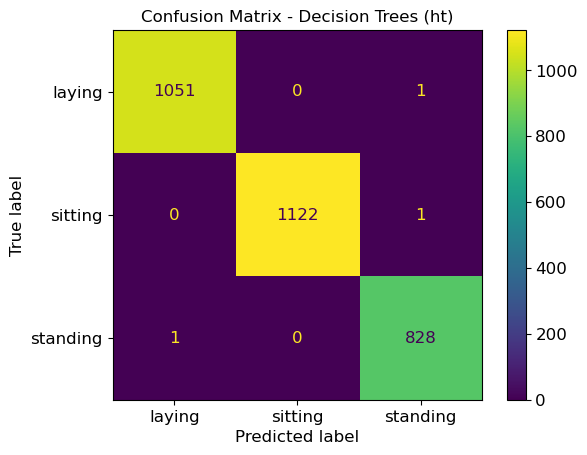

In [143]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred), display_labels=dt2.classes_);

disp.plot()
plt.rcParams.update({'font.size': 10})
plt.title("Confusion Matrix - Decision Trees (ht)")
plt.show()

In [146]:
print(metrics.classification_report(y_test, y_pred, target_names=dt2.classes_, digits=3))


              precision    recall  f1-score   support

      laying      0.999     0.999     0.999      1052
     sitting      1.000     0.999     1.000      1123
    standing      0.998     0.999     0.998       829

    accuracy                          0.999      3004
   macro avg      0.999     0.999     0.999      3004
weighted avg      0.999     0.999     0.999      3004



In [149]:
for feature, importance in zip(df.columns, dt2.feature_importances_):
    print('Feature: ', feature, '\t','Importance: ', importance)

In [147]:
feat_imp = pd.Series(data=dt2.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False)[:10]

label_T-1_laying                  0.594394
label_T-1_standing                0.400873
SMA10_gyr_avg_X                   0.001165
acc_max_Z (m/s^2)                 0.000792
grav_acc_max_X                    0.000511
gyr_max_Y (rad/s)                 0.000491
gyr_avg_X (rad/s)-polarity_T-1    0.000343
acc_std_Z (m/s^2)_T-1             0.000292
lin_acc_min_Y (m/s^2)_T-1         0.000267
lin_acc_min_Y (m/s^2)             0.000254
dtype: float64

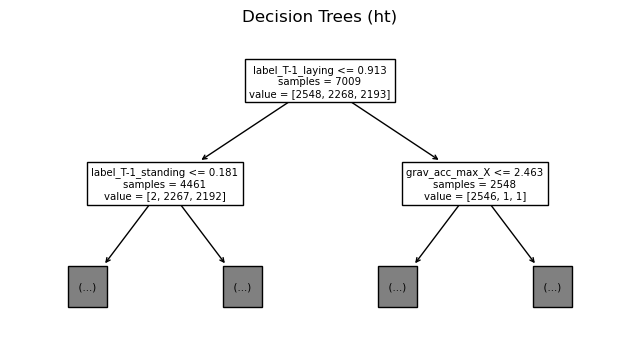

In [188]:
from sklearn import tree
plt.figure(figsize=(8,4))
plt.title("Decision Trees (ht)")
tree.plot_tree(dt2, max_depth=1, feature_names=X_test.columns, impurity=False)
plt.title("Decision Trees (ht)");
# tree.plot_tree(dt2, max_depth=2);

# Random Forest (def)

In [62]:
rf = RandomForestClassifier(random_state=1) 

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [64]:
y_pred = rf.predict(X_test) 

In [65]:
p4 = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision:", p4)

Precision: 0.7486006761446123


In [70]:
# for feature, importance in zip(df.columns, rf.feature_importances_):
#     print('Feature: ', feature, '\t','Importance: ', importance)

# Random Forest (ht)

In [76]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 200)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# create the Random Forest model 
rf_ = RandomForestClassifier()
# Random Search of parameters using 5-fold Cross Validation
scorer = metrics.make_scorer(metrics.precision_score, average = 'macro')
rf_random = RandomizedSearchCV(estimator = rf_, param_distributions = random_grid, scoring=scorer, 
                               n_iter = 15, cv = 5, random_state = 1, n_jobs = -1, verbose=2)
# fit the train data to the model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 209, 218, 227,
                                                         236, 245, 254, 263,
                                                         272, 281, 290, 299,
                                                         308, 317, 326, 335,
                                                         344, 353, 362, 371,
                                                         380, 389, 398, 408,
                                                         417, 426, 435, 444,
                                                         453, 462, ...]},
                   random_state=1,
                   scoring=make_scorer(precision_score, average=macro),
                   verbose=2)

In [77]:
d = rf_random.best_params_
rf2 = RandomForestClassifier(random_state = 1, n_estimators = d['n_estimators'],
                             min_samples_split = d['min_samples_split'], min_samples_leaf = d['min_samples_leaf'],
                             max_depth = d['max_depth'], bootstrap = d['bootstrap'])

In [78]:
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=4, n_estimators=1755,
                       random_state=1)

In [139]:
y_pred = rf2.predict(X_test) 
p5 = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision:", p5) 

Precision: 0.7641136688664646


In [136]:
for feature, importance in zip(df.columns, rf2.feature_importances_):
    print('Feature: ', feature, '\t','Importance: ', importance)

Feature:  acc_avg_X (m/s^2) 	 Importance:  0.009630718778315792
Feature:  acc_avg_Y (m/s^2) 	 Importance:  0.014312495690767466
Feature:  acc_avg_Z (m/s^2) 	 Importance:  0.028680735515560555
Feature:  gyr_avg_X (rad/s) 	 Importance:  0.0002919332430602945
Feature:  gyr_avg_Y (rad/s) 	 Importance:  0.0006930815179294332
Feature:  gyr_avg_Z (rad/s) 	 Importance:  0.0011086283212230084
Feature:  lin_acc_avg_X (m/s^2) 	 Importance:  0.0009112186363699446
Feature:  lin_acc_avg_Y (m/s^2) 	 Importance:  0.002838678151324583
Feature:  lin_acc_avg_Z (m/s^2) 	 Importance:  0.0008585551445647325
Feature:  mag_avg_X (µT) 	 Importance:  0.002888433257206266
Feature:  mag_avg_Y (µT) 	 Importance:  0.019017446346167304
Feature:  mag_avg_Z (µT) 	 Importance:  0.017722793783159555
Feature:  acc_std_X (m/s^2) 	 Importance:  0.00283690735537131
Feature:  acc_std_Y (m/s^2) 	 Importance:  0.00020188317973006303
Feature:  acc_std_Z (m/s^2) 	 Importance:  0.0016137663714980918
Feature:  gyr_std_X (rad/s) 	 

In [141]:
print(d)

{'shrinking': True, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}


In [142]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 473,  509,   70],
       [  64, 1043,   16],
       [  80,   79,  670]])

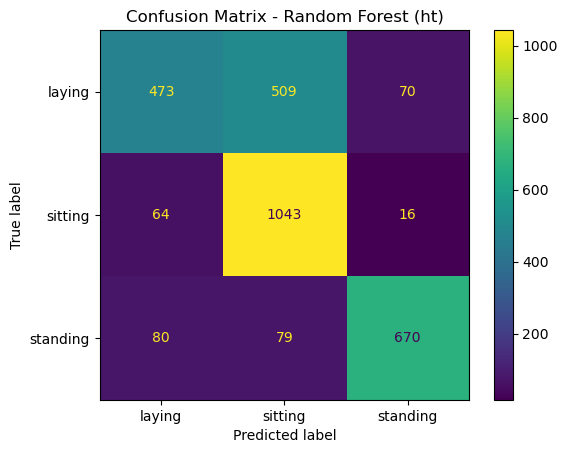

In [143]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred), display_labels=rf2.classes_);

disp.plot()
plt.rcParams.update({'font.size': 10})
plt.title("Confusion Matrix - Random Forest (ht)")
plt.show()

In [144]:
print(metrics.classification_report(y_test, y_pred, target_names=rf2.classes_, digits=3))


              precision    recall  f1-score   support

      laying      0.767     0.450     0.567      1052
     sitting      0.639     0.929     0.757      1123
    standing      0.886     0.808     0.845       829

    accuracy                          0.728      3004
   macro avg      0.764     0.729     0.723      3004
weighted avg      0.752     0.728     0.715      3004



In [145]:
feat_imp = pd.Series(data=rf2.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False)[:10]

acc_min_Z (m/s^2)_T-1    0.034366
SMA10_acc_avg_Z          0.033415
grav_acc_avg_Z_T-1       0.031370
acc_min_Z (m/s^2)        0.029146
acc_avg_Z (m/s^2)        0.028681
acc_avg_Z (m/s^2)_T-1    0.028298
grav_acc_min_Z_T-1       0.027933
grav_acc_avg_Z           0.027588
grav_acc_max_Z           0.026526
grav_acc_max_Z_T-1       0.026086
dtype: float64

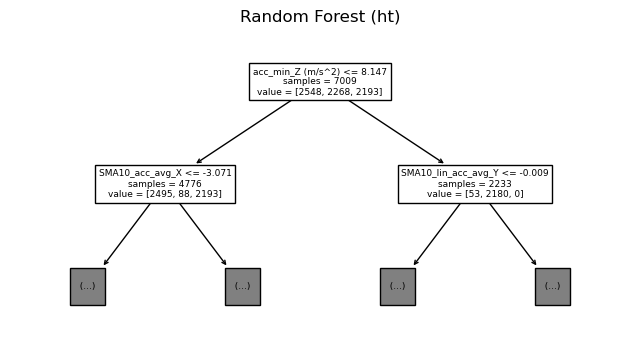

In [146]:
from sklearn import tree
plt.figure(figsize=(8,4))
tree.plot_tree(dt2, max_depth=1, feature_names=X_test.columns, impurity=False)
plt.title("Random Forest (ht)");

# Neural Network (def)

In [114]:
nn = MLPClassifier(validation_fraction=0.2, early_stopping=True, random_state=1)

In [94]:
nn.fit(X_train, y_train)

MLPClassifier(early_stopping=True, random_state=1, validation_fraction=0.2)

In [95]:
y_pred = nn.predict(X_test)
p_1 = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision:", p_1)

Precision: 0.7857572910518211


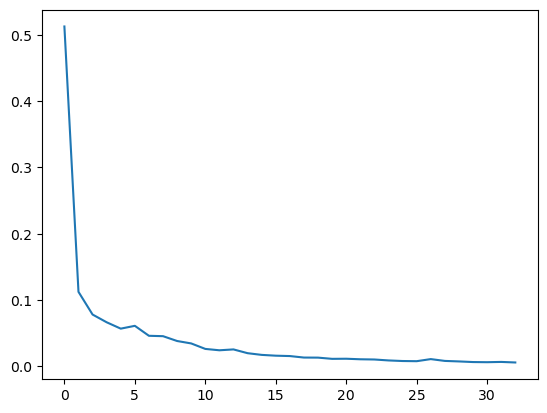

In [23]:
plt.plot(nn.loss_curve_);

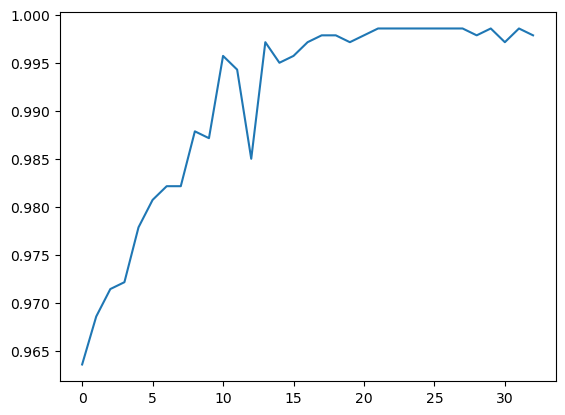

In [24]:
plt.plot(nn.validation_scores_);

# Neural Network (ht)

In [96]:
# tuning lr
learning_rate_init = [0.0001, 0.00034, 0.001, 0.0034, 0.01, 0.034]

In [97]:
nn1 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[0], max_iter = 500, random_state = 1)
nn1.fit(X_train, y_train)
nn2 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[1], max_iter = 500, random_state = 1)
nn2.fit(X_train, y_train)
nn3 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[2], max_iter = 500, random_state = 1)
nn3.fit(X_train, y_train)
nn4 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[3], max_iter = 500, random_state = 1)
nn4.fit(X_train, y_train)
nn5 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[4], max_iter = 500, random_state = 1)
nn5.fit(X_train, y_train)
nn6 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[5], max_iter = 500, random_state = 1)
nn6.fit(X_train, y_train)

MLPClassifier(early_stopping=True, learning_rate_init=0.034, max_iter=500,
              random_state=1, validation_fraction=0.2)

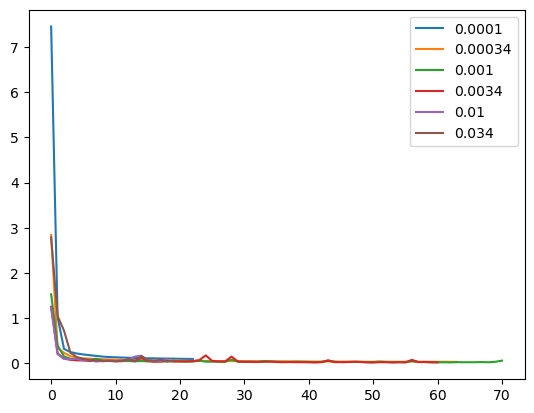

In [98]:
plt.plot(nn1.loss_curve_, label=learning_rate_init[0]);
plt.plot(nn2.loss_curve_, label=learning_rate_init[1]);
plt.plot(nn3.loss_curve_, label=learning_rate_init[2]); #
plt.plot(nn4.loss_curve_, label=learning_rate_init[3]);
plt.plot(nn5.loss_curve_, label=learning_rate_init[4]);
plt.plot(nn6.loss_curve_, label=learning_rate_init[5]);
plt.legend();

In [99]:
# tuning hidden_layer_sizes
hidden_layer_sizes = [[5,], [10,], [25,], [100,]]

In [100]:
nn1 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[2], 
                    max_iter = 500, random_state = 1, hidden_layer_sizes = hidden_layer_sizes[0])
nn1.fit(X_train, y_train)

nn2 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[2], 
                    max_iter = 500, random_state = 1, hidden_layer_sizes = hidden_layer_sizes[1])
nn2.fit(X_train, y_train)

nn3 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[2], 
                    max_iter = 500, random_state = 1, hidden_layer_sizes = hidden_layer_sizes[2])
nn3.fit(X_train, y_train)

nn4 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[2], 
                    max_iter = 500, random_state = 1, hidden_layer_sizes = hidden_layer_sizes[3])
nn4.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=[100], max_iter=500,
              random_state=1, validation_fraction=0.2)

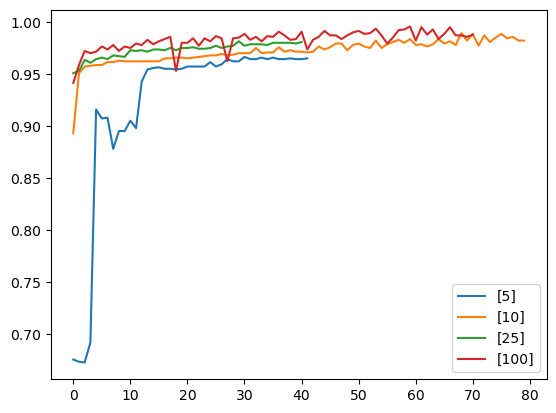

In [101]:
plt.plot(nn1.validation_scores_, label=hidden_layer_sizes[0]);
plt.plot(nn2.validation_scores_, label=hidden_layer_sizes[1]);
plt.plot(nn3.validation_scores_, label=hidden_layer_sizes[2]);
plt.plot(nn4.validation_scores_, label=hidden_layer_sizes[3]); #
plt.legend();

In [102]:
# tuning activation 
activation = ["logistic", "tanh", "relu"]

In [103]:
nn1 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[2], 
                    max_iter = 500, random_state = 1, hidden_layer_sizes = hidden_layer_sizes[3], 
                   activation = activation[0])
nn1.fit(X_train, y_train)

nn2 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[2], 
                    max_iter = 500, random_state = 1, hidden_layer_sizes = hidden_layer_sizes[3], 
                   activation = activation[1])
nn2.fit(X_train, y_train)

nn3 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[2], 
                    max_iter = 500, random_state = 1, hidden_layer_sizes = hidden_layer_sizes[3], 
                   activation = activation[2])
nn3.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=[100], max_iter=500,
              random_state=1, validation_fraction=0.2)

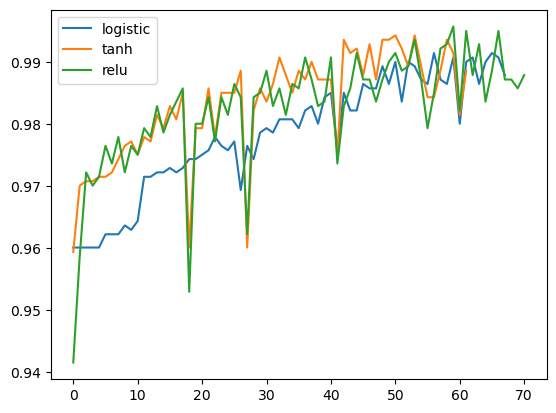

In [104]:
plt.plot(nn1.validation_scores_, label=activation[0]);
plt.plot(nn2.validation_scores_, label=activation[1]);#
plt.plot(nn3.validation_scores_, label=activation[2]);
plt.legend();

In [105]:
# tuning solver
solver = ["sgd", "adam"]

In [115]:
nn1 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[2], 
                    max_iter = 500, random_state = 1, hidden_layer_sizes = hidden_layer_sizes[3], 
                   activation = activation[1], solver = solver[0])
nn1.fit(X_train, y_train)

nn2 = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[2], 
                    max_iter = 500, random_state = 1, hidden_layer_sizes = hidden_layer_sizes[3], 
                   activation = activation[1], solver = solver[1])
nn2.fit(X_train, y_train)

MLPClassifier(activation='tanh', early_stopping=True, hidden_layer_sizes=[100],
              max_iter=500, random_state=1, validation_fraction=0.2)

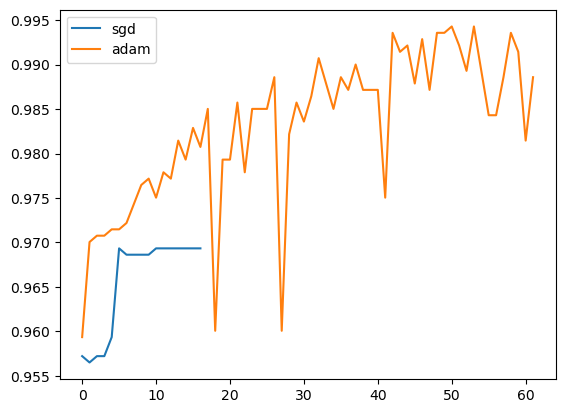

In [116]:
plt.plot(nn1.validation_scores_, label=solver[0]);
plt.plot(nn2.validation_scores_, label=solver[1]); #
plt.legend();

In [121]:
nn_ = MLPClassifier(validation_fraction=0.2, early_stopping=True, learning_rate_init=learning_rate_init[2], 
                    max_iter = 500, hidden_layer_sizes = hidden_layer_sizes[3], 
                   activation = activation[1], solver = solver[1], random_state = 42)
nn_.fit(X_train, y_train)

MLPClassifier(activation='tanh', early_stopping=True, hidden_layer_sizes=[100],
              max_iter=500, random_state=42, validation_fraction=0.2)

In [122]:
y_pred = nn_.predict(X_test)
p_2 = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision:", p_2)

Precision: 0.7662729250005466


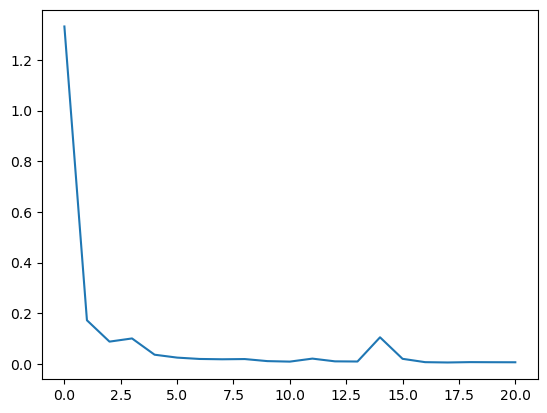

In [39]:
plt.plot(nn_.loss_curve_, label="loss curve");

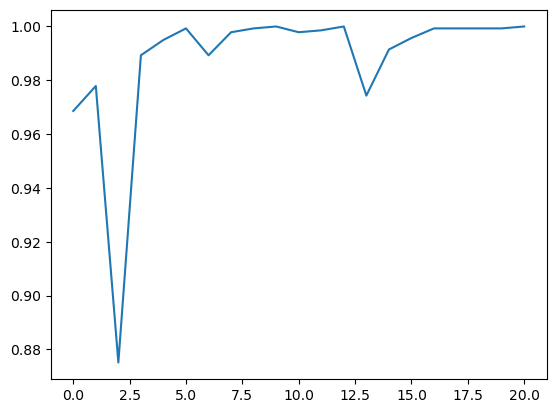

In [40]:
plt.plot(nn_.validation_scores_, label="validation loss");

# Decision Trees (ht) - without label_t-1

In [16]:
X_train.columns

Index(['acc_avg_X (m/s^2)', 'acc_avg_Y (m/s^2)', 'acc_avg_Z (m/s^2)',
       'gyr_avg_X (rad/s)', 'gyr_avg_Y (rad/s)', 'gyr_avg_Z (rad/s)',
       'lin_acc_avg_X (m/s^2)', 'lin_acc_avg_Y (m/s^2)',
       'lin_acc_avg_Z (m/s^2)', 'mag_avg_X (µT)',
       ...
       'SMA10_gyr_avg_Z', 'SMA10_lin_acc_avg_X', 'SMA10_lin_acc_avg_Y',
       'SMA10_lin_acc_avg_Z', 'SMA10_mag_avg_X', 'SMA10_mag_avg_Y',
       'SMA10_mag_avg_Z', 'label_T-1_laying', 'label_T-1_sitting',
       'label_T-1_standing'],
      dtype='object', length=225)

In [24]:
X_train_ = X_train.drop(['label_T-1_laying', 'label_T-1_sitting','label_T-1_standing'], axis=1)
X_test_ = X_test.drop(['label_T-1_laying', 'label_T-1_sitting','label_T-1_standing'], axis=1)

In [19]:
X_train_.columns

Index(['acc_avg_X (m/s^2)', 'acc_avg_Y (m/s^2)', 'acc_avg_Z (m/s^2)',
       'gyr_avg_X (rad/s)', 'gyr_avg_Y (rad/s)', 'gyr_avg_Z (rad/s)',
       'lin_acc_avg_X (m/s^2)', 'lin_acc_avg_Y (m/s^2)',
       'lin_acc_avg_Z (m/s^2)', 'mag_avg_X (µT)',
       ...
       'SMA10_acc_avg_Z', 'SMA10_gyr_avg_X', 'SMA10_gyr_avg_Y',
       'SMA10_gyr_avg_Z', 'SMA10_lin_acc_avg_X', 'SMA10_lin_acc_avg_Y',
       'SMA10_lin_acc_avg_Z', 'SMA10_mag_avg_X', 'SMA10_mag_avg_Y',
       'SMA10_mag_avg_Z'],
      dtype='object', length=222)

In [20]:
criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# create the random grid
random_grid = {'criterion': criterion,
               'splitter': splitter, 
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# create the Decision Tree model 
dt_ = DecisionTreeClassifier()
# Random Search of parameters using 5-fold Cross Validation
scorer = metrics.make_scorer(metrics.precision_score, average = 'macro')
dt_random = RandomizedSearchCV(estimator = dt_, param_distributions = random_grid, scoring=scorer, 
                               n_iter = 15, cv = 5, random_state = 42, n_jobs = -1)
# fit the train data to the model
dt_random.fit(X_train_, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42,
                   scoring=make_scorer(precision_score, average=macro))

In [21]:
d = dt_random.best_params_
dt2 = DecisionTreeClassifier(random_state = 42, criterion = d['criterion'], min_samples_split = d['min_samples_split'],
                             min_samples_leaf = d['min_samples_leaf'], max_depth = d['max_depth'],
                             splitter = d['splitter'])

In [22]:
print(d)

{'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}


In [23]:
dt2.fit(X_train_,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42)

In [26]:
y_pred = dt2.predict(X_test_) 
p3_ = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision:", p3_)

Precision: 0.7853693815031823


In [41]:
for i in range(len(y_pred)):
    y_pred[i] = "standing"

In [42]:
for i in range(len(y_pred)):
    print(y_pred[i])

standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
standing
s

In [43]:
# y_pred = dt2.predict(X_test_)
p3__ = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision:", p3__)

Precision: 0.09198845983133601


/Users/dragos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 459,  511,   82],
       [  13, 1084,   26],
       [  73,   72,  684]])

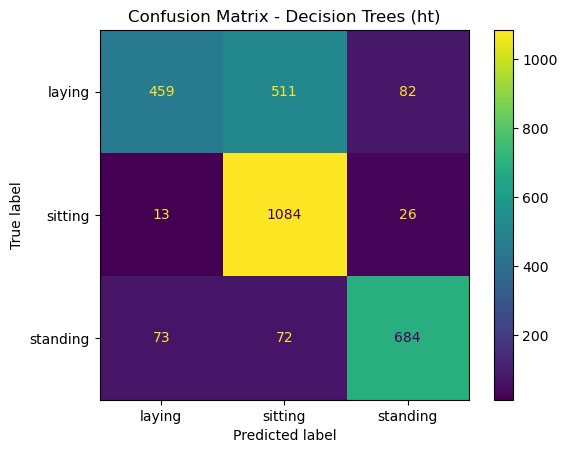

In [28]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred), display_labels=dt2.classes_);

disp.plot()
plt.rcParams.update({'font.size': 10})
plt.title("Confusion Matrix - Decision Trees (ht)")
plt.show()

In [146]:
print(metrics.classification_report(y_test, y_pred, target_names=dt2.classes_, digits=3))


              precision    recall  f1-score   support

      laying      0.999     0.999     0.999      1052
     sitting      1.000     0.999     1.000      1123
    standing      0.998     0.999     0.998       829

    accuracy                          0.999      3004
   macro avg      0.999     0.999     0.999      3004
weighted avg      0.999     0.999     0.999      3004



In [149]:
for feature, importance in zip(df.columns, dt2.feature_importances_):
    print('Feature: ', feature, '\t','Importance: ', importance)

In [147]:
feat_imp = pd.Series(data=dt2.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False)[:10]

label_T-1_laying                  0.594394
label_T-1_standing                0.400873
SMA10_gyr_avg_X                   0.001165
acc_max_Z (m/s^2)                 0.000792
grav_acc_max_X                    0.000511
gyr_max_Y (rad/s)                 0.000491
gyr_avg_X (rad/s)-polarity_T-1    0.000343
acc_std_Z (m/s^2)_T-1             0.000292
lin_acc_min_Y (m/s^2)_T-1         0.000267
lin_acc_min_Y (m/s^2)             0.000254
dtype: float64

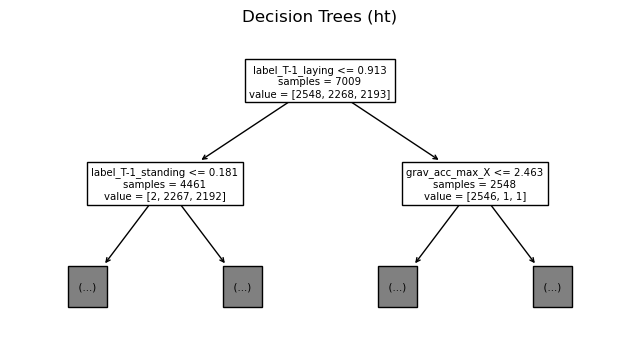

In [188]:
from sklearn import tree
plt.figure(figsize=(8,4))
plt.title("Decision Trees (ht)")
tree.plot_tree(dt2, max_depth=1, feature_names=X_test.columns, impurity=False)
plt.title("Decision Trees (ht)");
# tree.plot_tree(dt2, max_depth=2);